# Assignment 4
Name: Keshav Goyal

Roll no: 21BEC2297

# Importing libraries

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [289]:
df = pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [290]:
df.shape

(1599, 12)

In [291]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Checking NULL values

In [293]:
df.isnull().sum()
#There are no NULL values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Outlier detection and removal

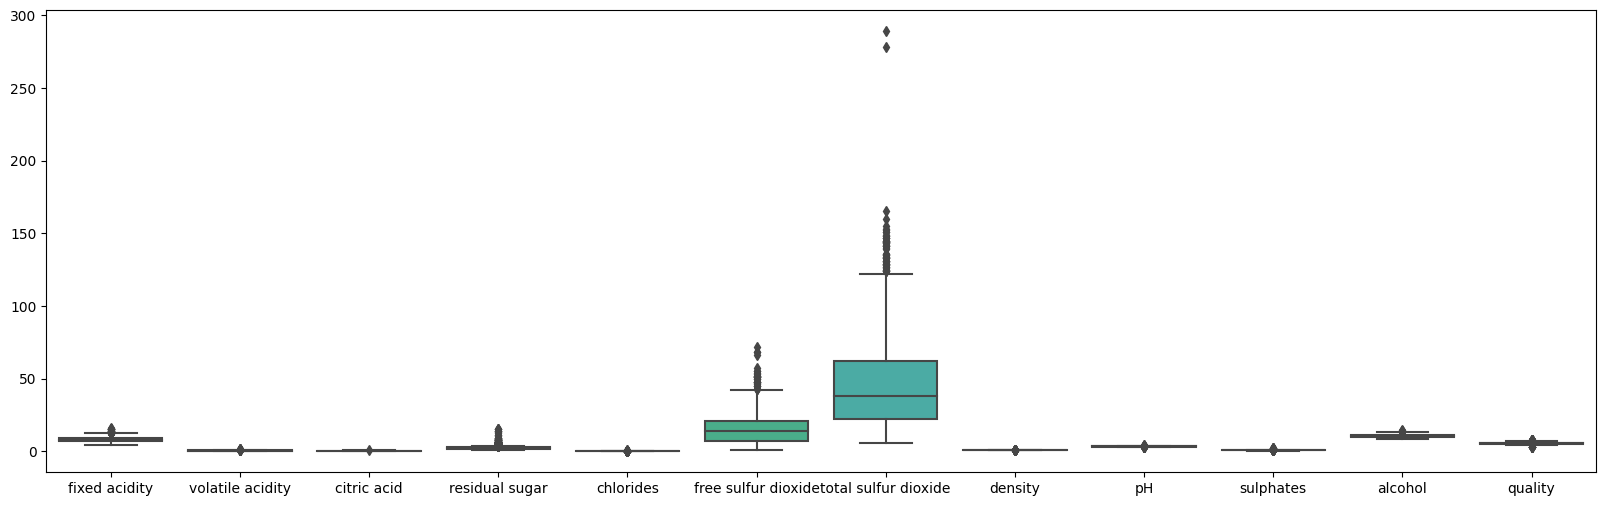

In [294]:
plt.figure(figsize=(20,6))
sns.boxplot(df.iloc[:,:])
plt.show()

In [295]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
feature_col=df.columns
feature_col=feature_col.drop('quality')
num_columns=len(feature_col)
for column in feature_col:
    median=df[column].median()
    upperlimit=Q3[column]+1.5*IQR[column]
    lowerlimit=Q1[column]-1.5*IQR[column]
    df[column]=np.where(((df[column]>upperlimit)|(df[column]<lowerlimit)),median,df[column])

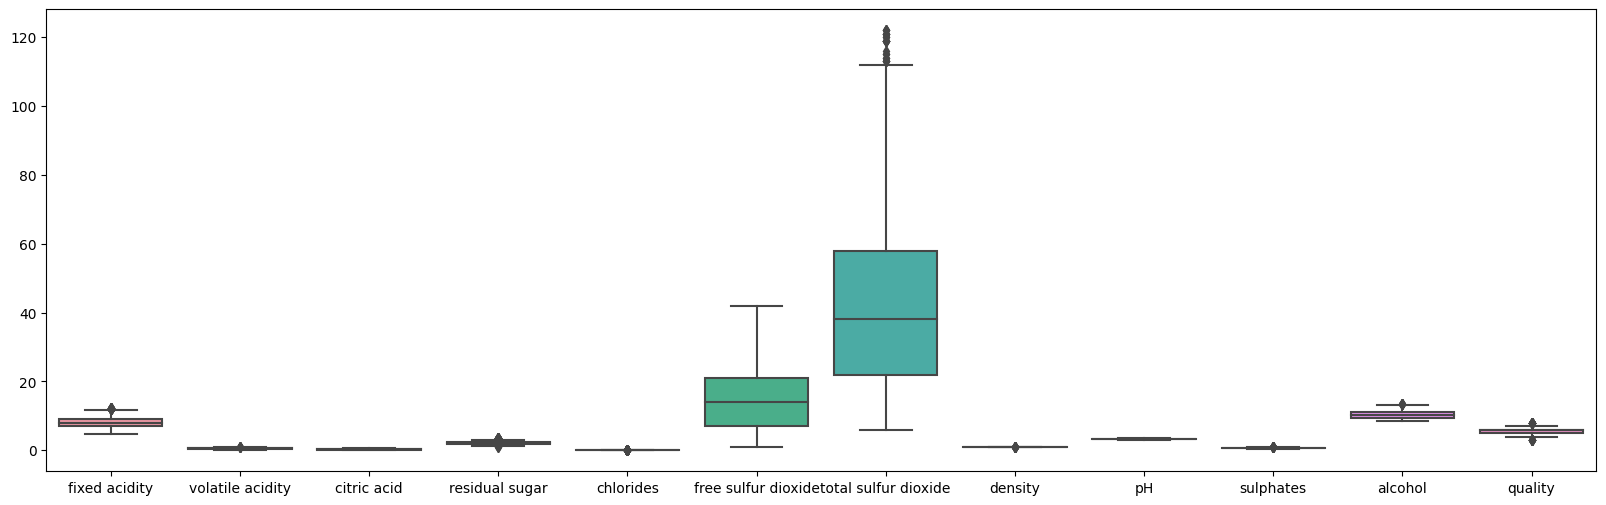

In [296]:
plt.figure(figsize=(20,6))
sns.boxplot(df.iloc[:,:])
plt.show()

# Correlation Heatmap

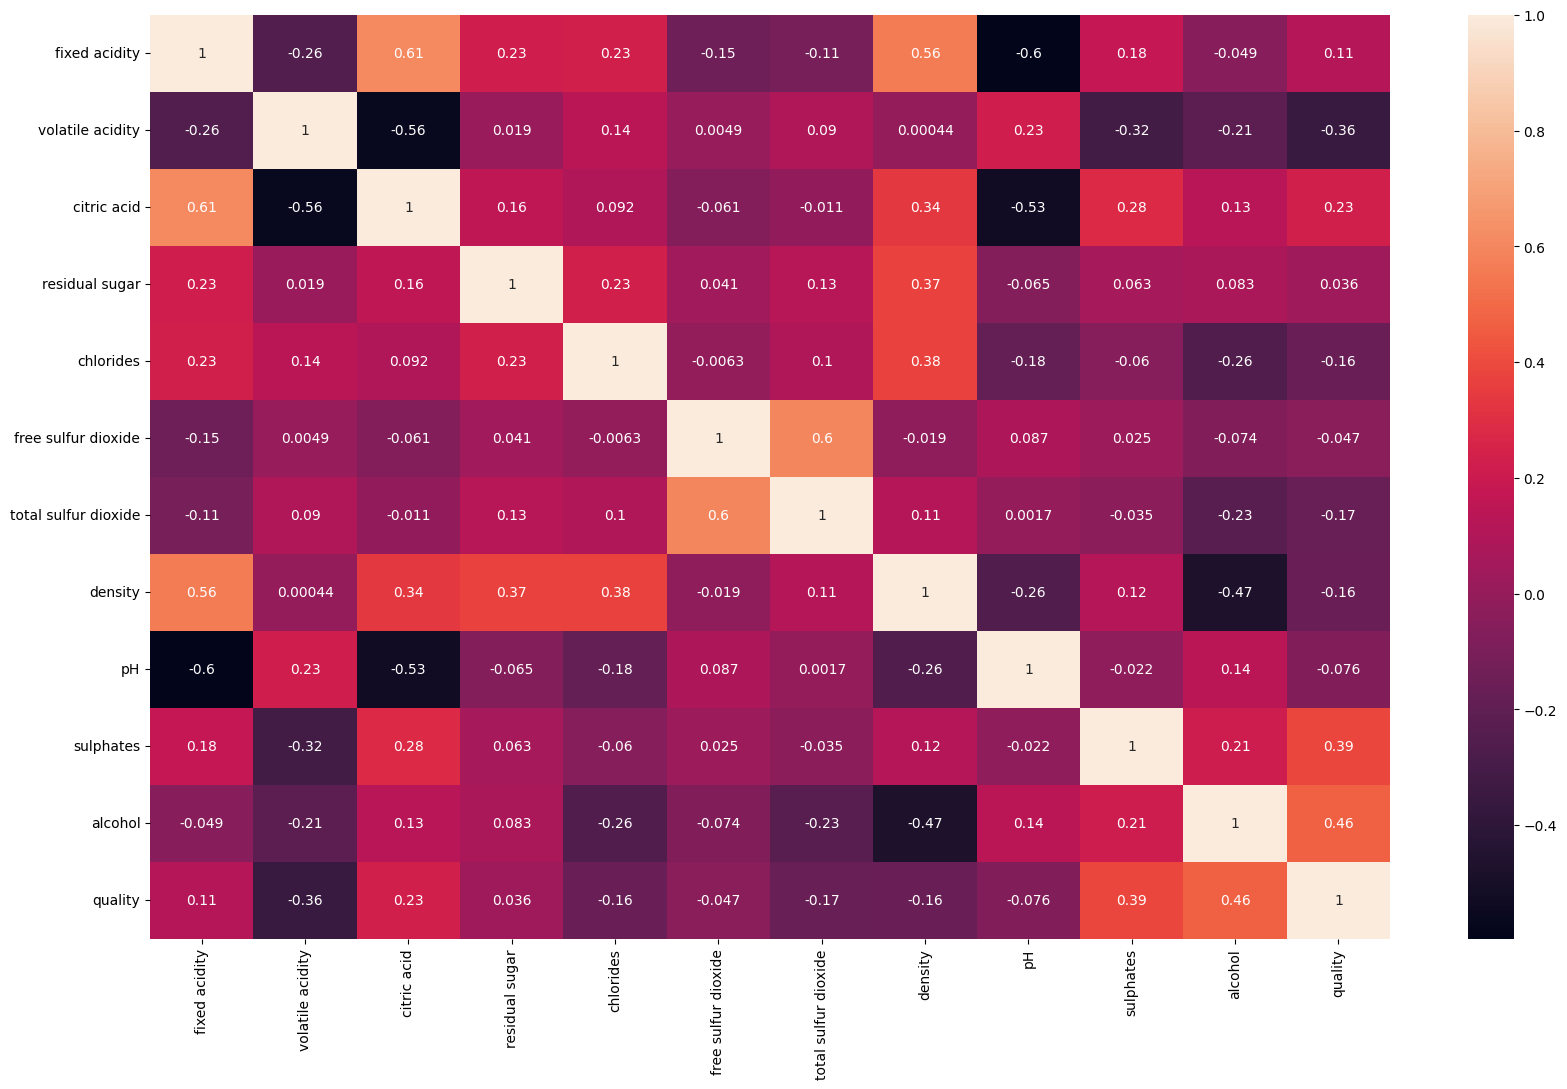

In [297]:
cor=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True)
plt.show()

In [298]:
cor['quality'].sort_values()

volatile acidity       -0.356247
total sulfur dioxide   -0.168010
density                -0.164179
chlorides              -0.162122
pH                     -0.075837
free sulfur dioxide    -0.047187
residual sugar          0.035506
fixed acidity           0.109637
citric acid             0.232209
sulphates               0.385729
alcohol                 0.464152
quality                 1.000000
Name: quality, dtype: float64

# Visualizations

**Univariate analysis**

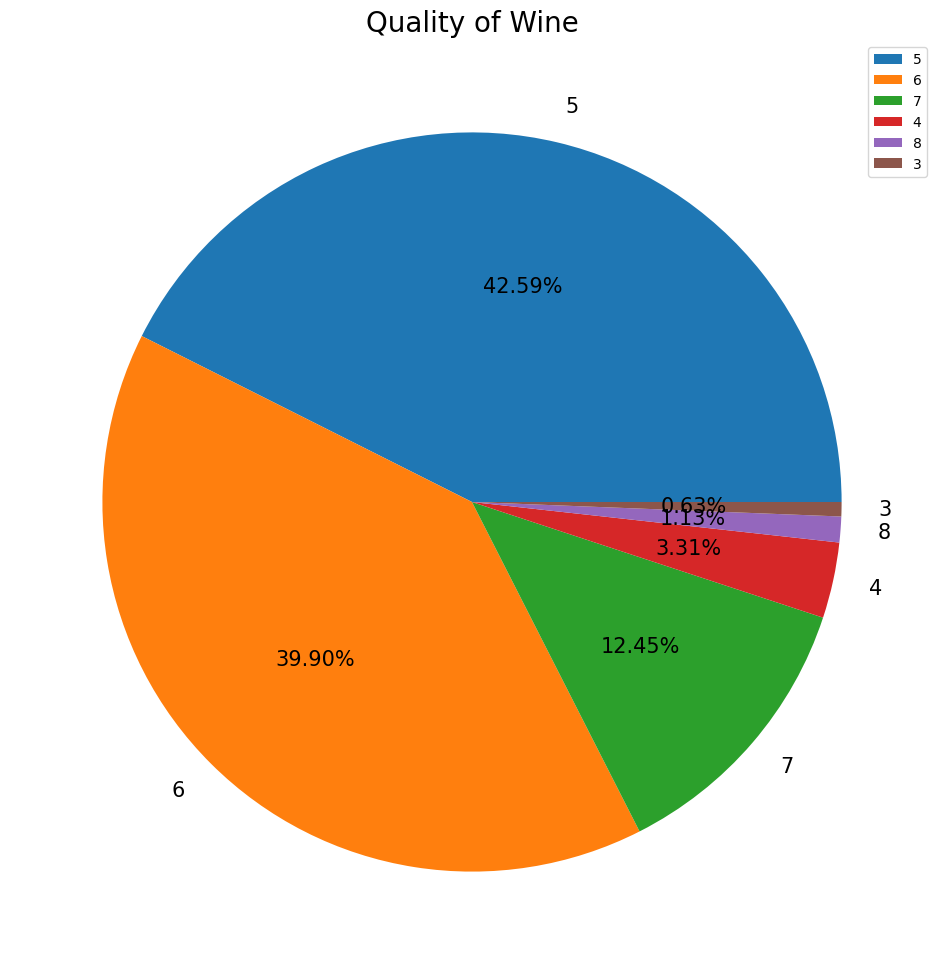

In [299]:
q_count=df['quality'].value_counts()
plt.figure(figsize=(12,12))
plt.title('Quality of Wine',fontdict={"fontsize":20})
plt.pie(q_count,labels=q_count.keys(),autopct='%.2f%%',textprops={"fontsize":15})
plt.legend()
plt.show()

**Bivariate analysis**

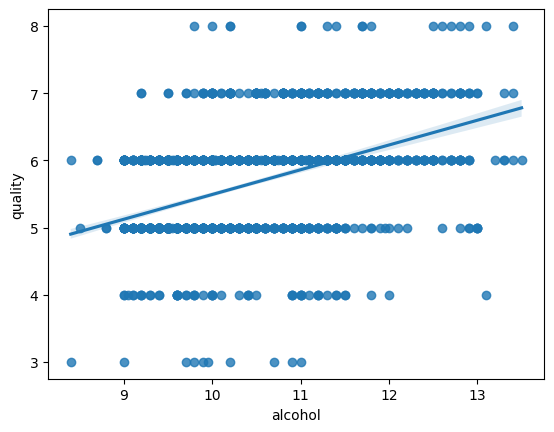

In [300]:
sns.regplot(x=df['alcohol'],y = df['quality'])
plt.show()

**Multi-variate analysis**

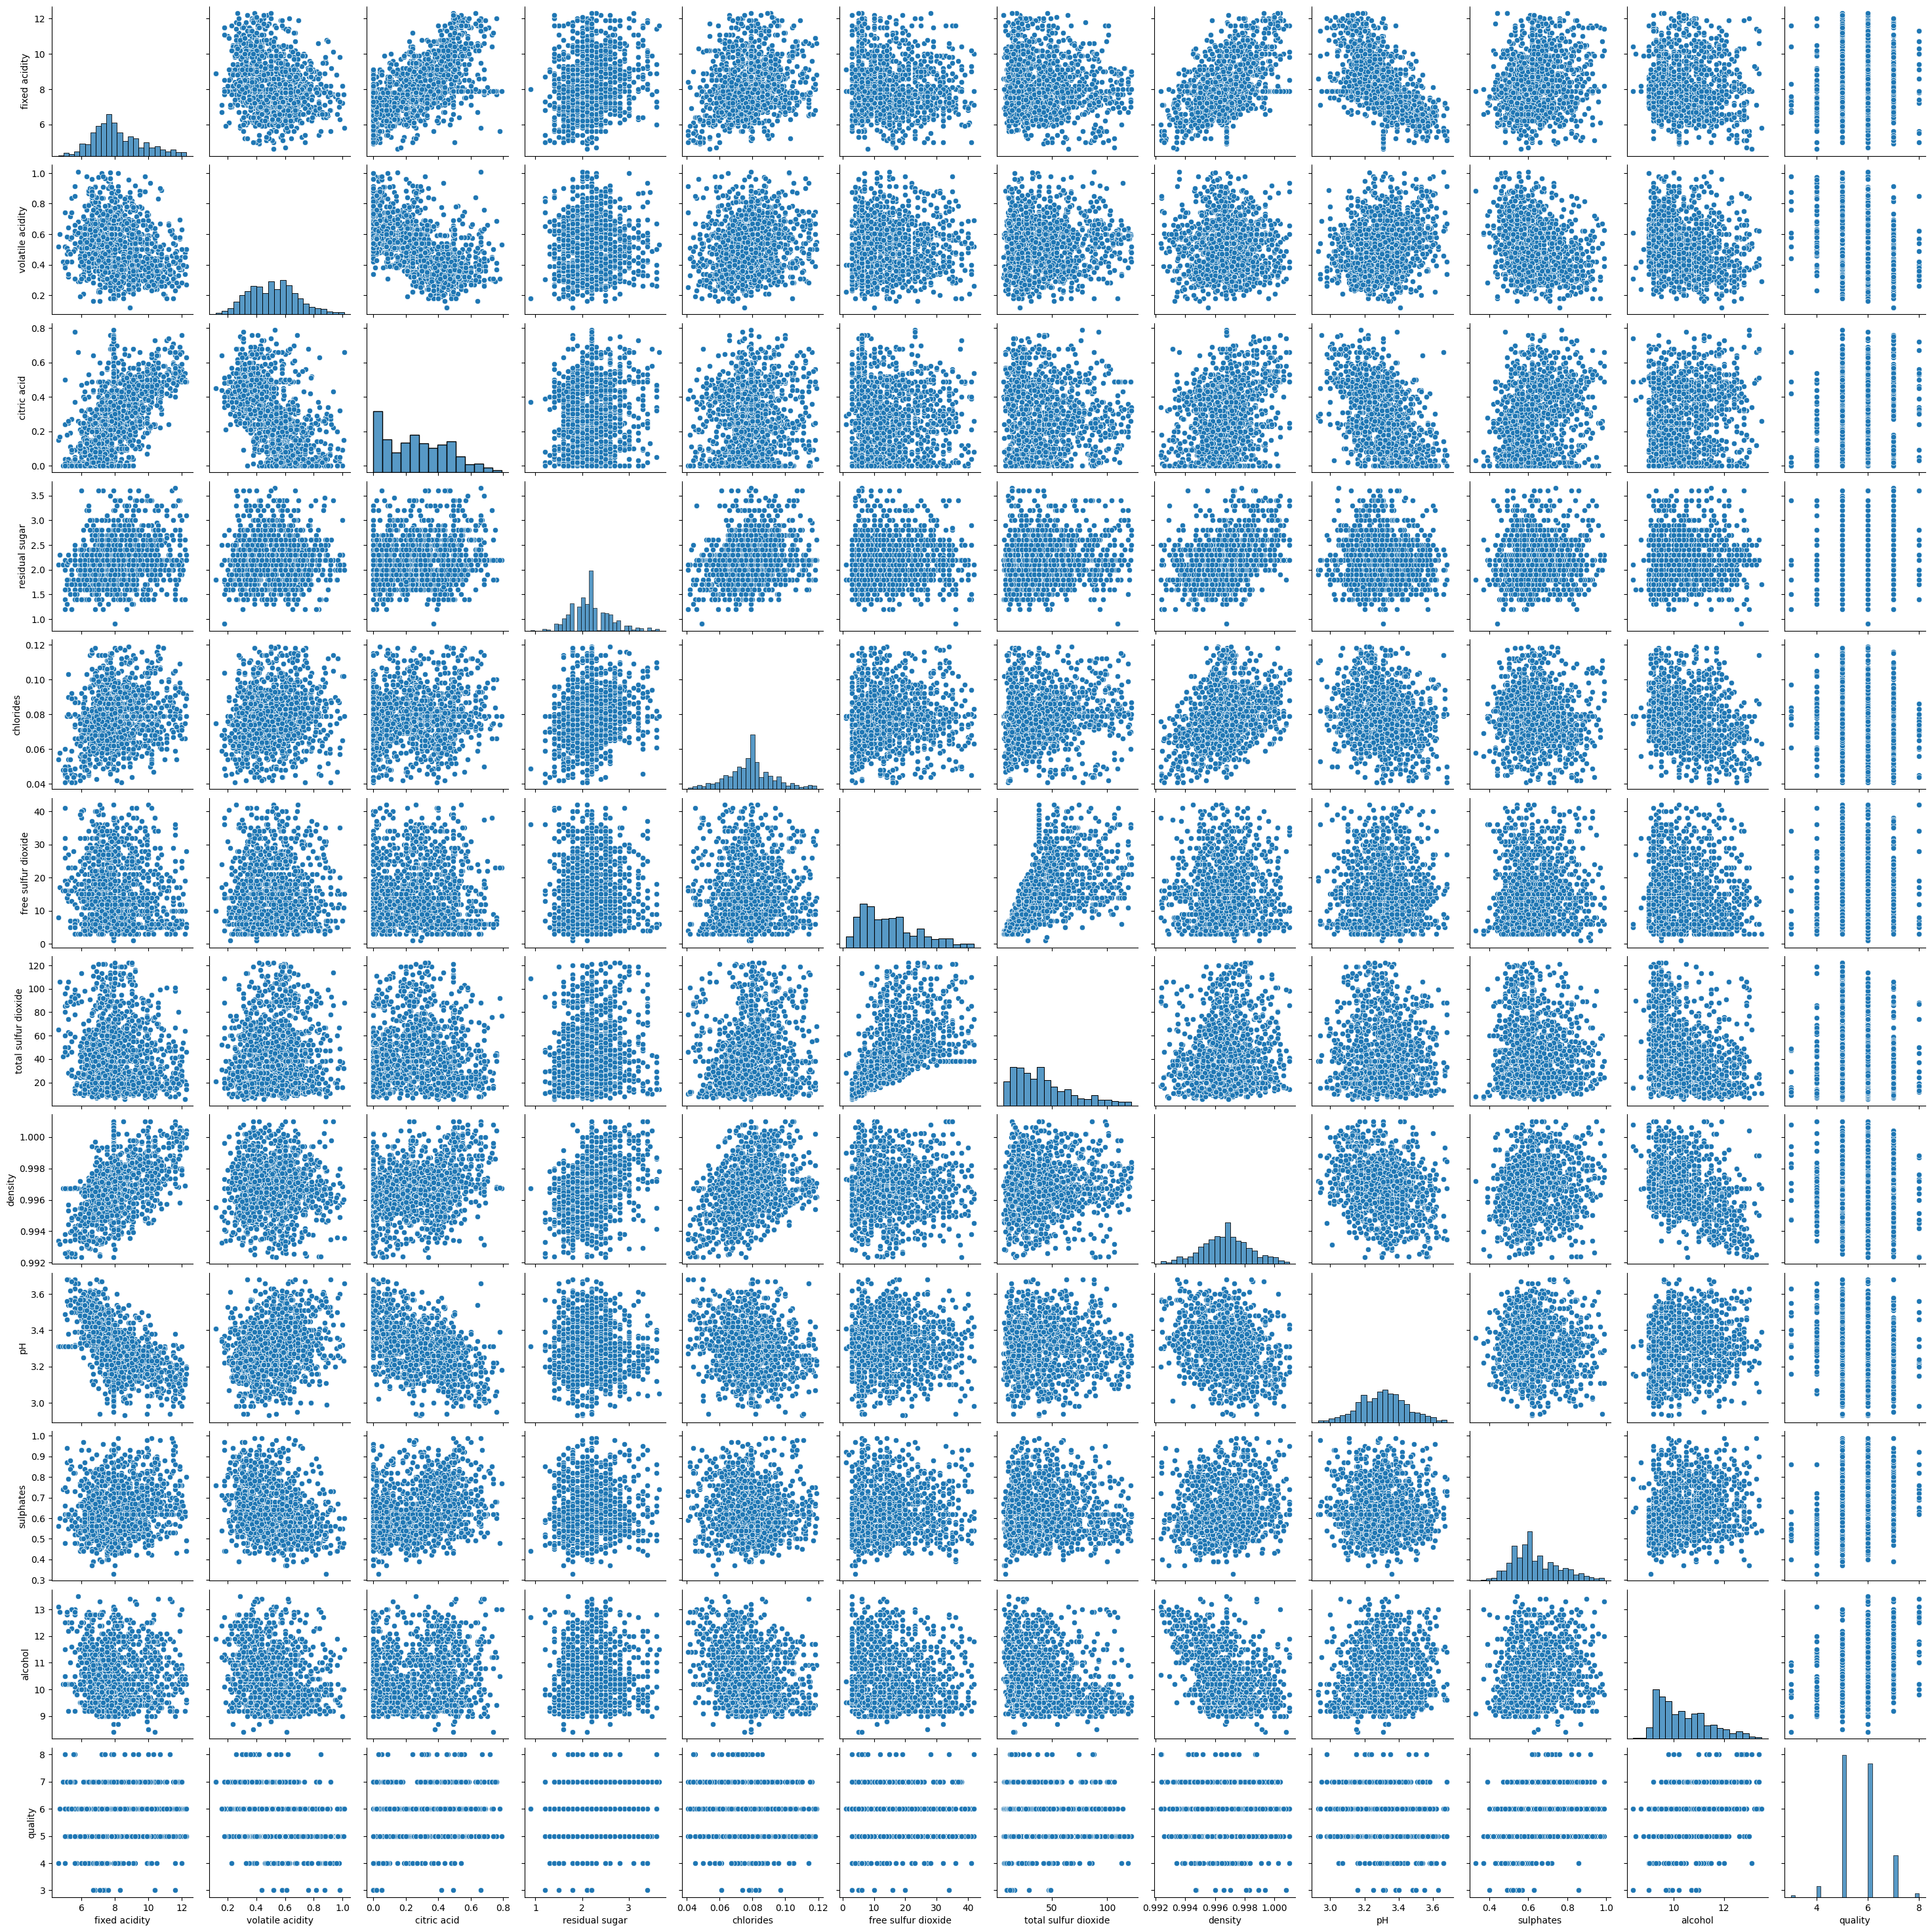

In [301]:
sns.pairplot(df)

# Label Encoding

In [319]:
def categorize(i):
    if(i>=3 and i<=5):
        return "Low"
    else:
        return "High"

In [320]:
df.quality=df.quality.apply(categorize)

In [321]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.quality=le.fit_transform(df.quality)
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             2.2      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        1  
4      9.4        0  
5      9.4        0  
6      9.4        0  
7     10.0        1  
8      9.5        1  
9     10.5        0

In [322]:
label_dict={0:le.inverse_transform([0])[0],1:le.inverse_transform([1])[0]}
label_dict

{0: 'High', 1: 'Low'}

In [323]:
df.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

# Splitting scalling and balancing dataset

In [324]:
X=df.drop(['quality'],axis=1)
Y=df.quality

In [325]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=pd.DataFrame(mm.fit_transform(X),columns=X.columns)
X.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        0.363636          0.651685     0.000000        0.363636   0.448718   
1        0.415584          0.853933     0.000000        0.618182   0.730769   
2        0.415584          0.719101     0.050633        0.509091   0.653846   
3        0.857143          0.179775     0.708861        0.363636   0.435897   
4        0.363636          0.651685     0.000000        0.363636   0.448718   
5        0.363636          0.606742     0.000000        0.327273   0.435897   
6        0.428571          0.539326     0.075949        0.254545   0.358974   
7        0.350649          0.595506     0.000000        0.109091   0.307692   
8        0.415584          0.516854     0.025316        0.400000   0.410256   
9        0.376623          0.426966     0.455696        0.472727   0.384615   
10       0.272727          0.516854     0.101266        0.327273   0.717949   
11       0.376623          0.426966     0.455696        0.472727   0.384615   
12       0.129870          0.556180     0.000000        0.254545   0.615385   
13       0.415584          0.550562     0.367089        0.254545   0.935897   
14       0.558442          0.561798     0.227848        0.472727   0.487179   
15       0.558442          0.561798     0.240506        0.472727   0.487179   
16       0.506494          0.179775     0.708861        0.327273   0.653846   
17       0.454545          0.494382     0.354430        0.290909   0.487179   
18       0.363636          0.528090     0.101266        0.472727   0.576923   
19       0.428571          0.224719     0.645570        0.327273   0.487179   

    free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0              0.243902              0.241379  0.630058  0.773333   0.348485   
1              0.585366              0.525862  0.514451  0.360000   0.530303   
2              0.341463              0.413793  0.537572  0.440000   0.484848   
3              0.390244              0.465517  0.653179  0.306667   0.378788   
4              0.243902              0.241379  0.630058  0.773333   0.348485   
5              0.292683              0.293103  0.630058  0.773333   0.348485   
6              0.341463              0.456897  0.468208  0.493333   0.196970   
7              0.341463              0.129310  0.260116  0.613333   0.212121   
8              0.195122              0.103448  0.514451  0.573333   0.363636   
9              0.390244              0.827586  0.630058  0.560000   0.712121   
10             0.341463              0.508621  0.410405  0.466667   0.318182   
11             0.390244              0.827586  0.630058  0.560000   0.712121   
12             0.365854              0.456897  0.225434  0.866667   0.287879   
13             0.195122              0.198276  0.583815  0.440000   0.439394   
14             0.317073              0.275862  0.722543  0.306667   0.833333   
15             0.317073              0.275862  0.722543  0.320000   0.909091   
16             0.829268              0.836207  0.526012  0.493333   0.636364   
17             0.365854              0.431034  0.514451  0.240000   0.439394   
18             0.121951              0.198276  0.583815  0.600000   0.257576   
19             0.390244              0.431034  0.526012  0.146667   0.439394   

     alcohol  
0   0.196078  
1   0.274510  
2   0.274510  
3   0.274510  
4   0.196078  
5   0.196078  
6   0.196078  
7   0.313725  
8   0.215686  
9   0.411765  
10  0.156863  
11  0.411765  
12  0.294118  
13  0.137255  
14  0.156863  
15  0.156863  
16  0.411765  
17  0.176471  
18  0.117647  
19  0.156863

In [326]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [327]:
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (1279, 11)
Shape of x_test: (320, 11)
Shape of y_train: (1279,)
Shape of y_test: (320,)


In [328]:
y_train.value_counts()

1    694
0    585
Name: quality, dtype: int64

In [329]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=6)
x_train_sampled,y_train_sampled=sm.fit_resample(x_train,y_train)
y_train_sampled.value_counts()

1    694
0    694
Name: quality, dtype: int64

In [330]:
print('Shape of balanced x_train:',x_train_sampled.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of balanced y_train:',y_train_sampled.shape)
print('Shape of y_test:',y_test.shape)

Shape of balanced x_train: (1388, 11)
Shape of x_test: (320, 11)
Shape of balanced y_train: (1388,)
Shape of y_test: (320,)


# Model building

In [331]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [332]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [333]:
from sklearn.metrics import accuracy_score
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.85


In [335]:
input_data1 = (7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
input_data2 = (7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7)
# changing the input data to a numpy array
input_data_as_numpy_array1 = np.asarray(input_data1)
input_data_as_numpy_array2 = np.asarray(input_data2)
# reshape the data as we are predicting the label for only one instance
input_data_reshaped1 = input_data_as_numpy_array1.reshape(1,-1)
input_data_reshaped2 = input_data_as_numpy_array2.reshape(1,-1)
prediction1 = model.predict(input_data_reshaped1)
prediction2 = model.predict(input_data_reshaped2)
print(prediction1)
print(prediction2)

if (prediction1[0]==1):
  print('First Wine is a Good Quality Wine')
else:
  print('First Wine is a Bad Quality Wine')
if (prediction2[0]==1):
  print('Second Wine is a Good Quality Wine')
else:
  print('Second Wine is a Bad Quality Wine')

[1]
[0]
First Wine is a Good Quality Wine
Second Wine is a Bad Quality Wine


# Test with Random observations

In [336]:
random_index=np.random.randint(0,x_test.shape[0])
random_index

64

In [337]:
random_parameters=x_test.iloc[random_index].values
random_parameters

array([0.35064935, 0.29213483, 0.26582278, 0.4       , 0.5       ,
       0.14634146, 0.25      , 0.43352601, 0.53333333, 0.21212121,
       0.21568627])

In [339]:
predicted_label=label_dict[model.predict([random_parameters])[0]]
true_label=label_dict[y_test.iloc[random_index]]
print('Predicted Label is:',predicted_label)
print('True Label is:',true_label)

Predicted Label is: High
True Label is: High
